In [ ]:
# Script using the FPL API to pull in player performance data and build functions to analyse and plot it

In [1]:
import requests, json
from pprint import pprint
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import pandas as pd

pd.set_option('display.max_columns', None)

In [2]:
# base url for all FPL API endpoints
base_url = 'https://fantasy.premierleague.com/api/'

# get data from bootstrap-static endpoint
r = requests.get(base_url+'bootstrap-static/').json()

# show the top level fields
pprint(r, indent=2, depth=1, compact=True)

{ 'element_stats': [...],
  'element_types': [...],
  'elements': [...],
  'events': [...],
  'game_settings': {...},
  'phases': [...],
  'teams': [...],
  'total_players': 8659111}


In [3]:
# get player data from 'elements' field
players = r['elements']

# show data for first player
pprint(players[0])

{'assists': 0,
 'bonus': 0,
 'bps': 48,
 'chance_of_playing_next_round': None,
 'chance_of_playing_this_round': None,
 'clean_sheets': 0,
 'code': 80201,
 'corners_and_indirect_freekicks_order': None,
 'corners_and_indirect_freekicks_text': '',
 'cost_change_event': 0,
 'cost_change_event_fall': 0,
 'cost_change_start': -4,
 'cost_change_start_fall': 4,
 'creativity': '0.0',
 'creativity_rank': 571,
 'creativity_rank_type': 59,
 'direct_freekicks_order': None,
 'direct_freekicks_text': '',
 'dreamteam_count': 0,
 'element_type': 1,
 'ep_next': '1.0',
 'ep_this': '-0.5',
 'event_points': 0,
 'first_name': 'Bernd',
 'form': '0.0',
 'goals_conceded': 9,
 'goals_scored': 0,
 'ict_index': '7.9',
 'ict_index_rank': 344,
 'ict_index_rank_type': 24,
 'id': 1,
 'in_dreamteam': False,
 'influence': '79.0',
 'influence_rank': 269,
 'influence_rank_type': 24,
 'minutes': 270,
 'news': '',
 'news_added': None,
 'now_cost': 46,
 'own_goals': 0,
 'penalties_missed': 0,
 'penalties_order': None,
 'pen

In [4]:
# create players dataframe
players = pd.json_normalize(r['elements'])

# show some information about first five players
players[['id', 'web_name', 'team', 'element_type']].head()

,id,web_name,team,element_type
0,1,Leno,1,1
1,2,Rúnarsson,1,1
2,3,Willian,1,3
3,4,Aubameyang,1,4
4,5,Cédric,1,2


In [5]:
# create teams dataframe
teams = pd.json_normalize(r['teams'])

teams[['id', 'name']]

,id,name
0,1,Arsenal
1,2,Aston Villa
2,3,Brentford
3,4,Brighton
4,5,Burnley
5,6,Chelsea
6,7,Crystal Palace
7,8,Everton
8,9,Leicester
9,10,Leeds


In [6]:
# get position information from 'element_types' field
positions = pd.json_normalize(r['element_types'])

positions.head()

,id,plural_name,plural_name_short,singular_name,singular_name_short,squad_select,squad_min_play,squad_max_play,ui_shirt_specific,sub_positions_locked,element_count
0,1,Goalkeepers,GKP,Goalkeeper,GKP,2,1,1,True,[12],72
1,2,Defenders,DEF,Defender,DEF,5,3,5,False,[],213
2,3,Midfielders,MID,Midfielder,MID,5,2,5,False,[],260
3,4,Forwards,FWD,Forward,FWD,3,1,3,False,[],86


In [7]:
# join players to teams
df = pd.merge(
    left=players,
    right=teams,
    left_on='team',
    right_on='id'
)

# show joined result
df[['first_name', 'second_name', 'name']].head()

,first_name,second_name,name
0,Bernd,Leno,Arsenal
1,Rúnar Alex,Rúnarsson,Arsenal
2,Willian,Borges Da Silva,Arsenal
3,Pierre-Emerick,Aubameyang,Arsenal
4,Cédric,Soares,Arsenal


In [8]:
# join player positions
df = df.merge(
    positions,
    left_on='element_type',
    right_on='id'
)

# rename columns
df = df.rename(
    columns={'name':'team_name', 'singular_name':'position_name'}
)

# show result
df[
    ['first_name', 'second_name', 'team_name', 'position_name']
].head()

,first_name,second_name,team_name,position_name
0,Bernd,Leno,Arsenal,Goalkeeper
1,Rúnar Alex,Rúnarsson,Arsenal,Goalkeeper
2,Karl,Hein,Arsenal,Goalkeeper
3,Aaron,Ramsdale,Arsenal,Goalkeeper
4,Arthur,Okonkwo,Arsenal,Goalkeeper


In [9]:
# get data from 'element-summary/{PID}/' endpoint for PID=4
r = requests.get(base_url + 'element-summary/4/').json()

# show top-level fields for player summary
pprint(r, depth=1)

{'fixtures': [...], 'history': [...], 'history_past': [...]}


In [10]:
# show data for first gameweek
pprint(r['history'][0])

{'assists': 0,
 'bonus': 0,
 'bps': 0,
 'clean_sheets': 0,
 'creativity': '0.0',
 'element': 4,
 'fixture': 1,
 'goals_conceded': 0,
 'goals_scored': 0,
 'ict_index': '0.0',
 'influence': '0.0',
 'kickoff_time': '2021-08-13T19:00:00Z',
 'minutes': 0,
 'opponent_team': 3,
 'own_goals': 0,
 'penalties_missed': 0,
 'penalties_saved': 0,
 'red_cards': 0,
 'round': 1,
 'saves': 0,
 'selected': 200068,
 'team_a_score': 0,
 'team_h_score': 2,
 'threat': '0.0',
 'total_points': 0,
 'transfers_balance': 0,
 'transfers_in': 0,
 'transfers_out': 0,
 'value': 100,
 'was_home': False,
 'yellow_cards': 0}


In [11]:
def get_gameweek_history(player_id):
    '''get all gameweek info for a given player_id'''
    
    # send GET request to
    # https://fantasy.premierleague.com/api/element-summary/{PID}/
    r = requests.get(
            base_url + 'element-summary/' + str(player_id) + '/'
    ).json()
    
    # extract 'history' data from response into dataframe
    df = pd.json_normalize(r['history'])
    
    return df


# show player #4's gameweek history
get_gameweek_history(4)[
    [
        'round',
        'total_points',
        'minutes',
        'goals_scored',
        'assists'
    ]
].head()

,round,total_points,minutes,goals_scored,assists
0,1,0,0,0,0
1,2,1,29,0,0
2,3,1,58,0,0
3,4,9,90,1,0
4,5,2,90,0,0


In [12]:
def get_season_history(player_id):
    '''get all past season info for a given player_id'''
    
    # send GET request to
    # https://fantasy.premierleague.com/api/element-summary/{PID}/
    r = requests.get(
            base_url + 'element-summary/' + str(player_id) + '/'
    ).json()
    
    # extract 'history_past' data from response into dataframe
    df = pd.json_normalize(r['history_past'])
    
    return df


# show player #1's season history
get_season_history(1)[
    [
        'season_name',
        'total_points',
        'minutes',
        'goals_scored',
        'assists'
    ]
].head()

,season_name,total_points,minutes,goals_scored,assists
0,2018/19,106,2835,0,0
1,2019/20,114,2649,0,0
2,2020/21,131,3131,0,0


In [13]:
# select columns of interest from players df
players = players[
    ['id', 'first_name', 'second_name', 'web_name', 'team',
     'element_type']
]

# join team name
players = players.merge(
    teams[['id', 'name']],
    left_on='team',
    right_on='id',
    suffixes=['_player', None]
).drop(['team', 'id'], axis=1)

# join player positions
players = players.merge(
    positions[['id', 'singular_name_short']],
    left_on='element_type',
    right_on='id'
).drop(['element_type', 'id'], axis=1)

players.head()

,id_player,first_name,second_name,web_name,name,singular_name_short
0,1,Bernd,Leno,Leno,Arsenal,GKP
1,2,Rúnar Alex,Rúnarsson,Rúnarsson,Arsenal,GKP
2,532,Karl,Hein,Hein,Arsenal,GKP
3,559,Aaron,Ramsdale,Ramsdale,Arsenal,GKP
4,572,Arthur,Okonkwo,Okonkwo,Arsenal,GKP


In [14]:
from tqdm.auto import tqdm
tqdm.pandas()

In [15]:
# get gameweek histories for each player
points = players['id_player'].progress_apply(get_gameweek_history)

# combine results into single dataframe
points = pd.concat(df for df in points)

# join web_name & position!
points = players[['id_player', 'web_name', 'singular_name_short']].merge(
    points,
    left_on='id_player',
    right_on='element'
)

  0%|          | 0/631 [00:00<?, ?it/s]

In [16]:
# convert columns 'influence', 'creativity', 'threat', 'ict_index' into numeric type
points[['influence', 'creativity', 'threat', 'ict_index']] = points[['influence', 'creativity', 'threat', 'ict_index']].apply(pd.to_numeric)

In [17]:
points.head()

,id_player,web_name,singular_name_short,element,fixture,opponent_team,total_points,was_home,kickoff_time,team_h_score,team_a_score,round,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,value,transfers_balance,selected,transfers_in,transfers_out
0,1,Leno,GKP,1,1,3,1,False,2021-08-13T19:00:00Z,2,0,1,90,0,0,0,2,0,0,0,0,0,1,0,11,11.8,0.0,0.0,1.2,50,0,153122,0,0
1,1,Leno,GKP,1,18,6,2,True,2021-08-22T15:30:00Z,0,2,2,90,0,0,0,2,0,0,0,0,0,3,0,17,24.2,0.0,0.0,2.4,50,-25816,144885,2627,28443
2,1,Leno,GKP,1,24,12,1,False,2021-08-28T11:30:00Z,5,0,3,90,0,0,0,5,0,0,0,0,0,5,0,20,43.0,0.0,0.0,4.3,49,-14559,136757,5164,19723
3,1,Leno,GKP,1,31,15,0,True,2021-09-11T14:00:00Z,1,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,49,6564,153130,35360,28796
4,1,Leno,GKP,1,43,5,0,False,2021-09-18T14:00:00Z,0,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,49,-23847,129851,4822,28669


In [18]:
# define aggregate points function and create dataframe for each position to use in various other places

def aggregate(df, position=None):
    if position == None:
        aggregate_points = df.groupby(['element', 'web_name']).agg(
            {'total_points':'sum', 'goals_scored':'sum', 'assists':'sum', 
              'clean_sheets': 'sum', 'ict_index': 'sum', 'value': 'max'}
        ).reset_index().sort_values('total_points', ascending=False)
    else:
        aggregate_points = df.loc[df.singular_name_short == position].groupby(['element', 'web_name']).agg(
            {'total_points':'sum', 'goals_scored':'sum', 'assists':'sum', 
              'clean_sheets': 'sum', 'ict_index': 'sum', 'value': 'max'}
        ).reset_index().sort_values('total_points', ascending=False)
    return aggregate_points

In [45]:
def player_report(player, gameweeks='all', metric='total_points'):

    # Check whether the user has inputted anything into the function for "gameweeks"
    if gameweeks=='all':
        points_df = points
    else:
        points_df = points.loc[points['round'] >= max(points['round']) - gameweeks]
    
    # Filter points df for specific player
    player_df = points_df.loc[points_df.web_name == player]
    agg_df = aggregate(player_df)
    
    # Print table with stats for how the player has performed over the past n weeks
    display(agg_df)
    
    # Find player position
    position = player_df.singular_name_short.iloc[0]
  
    # Plotting histogram of points scored against players of their position
    ax = sns.histplot(data = aggregate(points_df, player_df.singular_name_short.iloc[0]), x = metric)
    title = 'Distribution of {m} by position: {p}, in the last {n} gameweeks'.format(m=metric,  p=position, n=gameweeks)
    ax.set_title(title)
    ax.axvline(agg_df[metric][0], color = 'red')
    plt.text(agg_df[metric][0], 20, player, rotation=45, color='red')
    plt.show()
    plt.clf()
    
# May also want to do a version of the function that just returns the df
# Will do later

,element,web_name,total_points,goals_scored,assists,clean_sheets,ict_index,value
0,413,Antonio,63,6,4,3,122.1,82


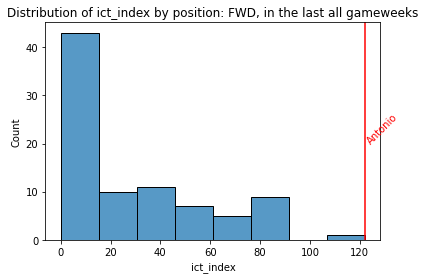

,element,web_name,total_points,goals_scored,assists,clean_sheets,ict_index,value
0,141,Havertz,20,1,1,3,21.7,81


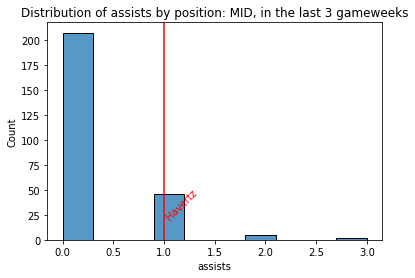

,element,web_name,total_points,goals_scored,assists,clean_sheets,ict_index,value
0,22,Saka,29,1,2,3,48.9,64


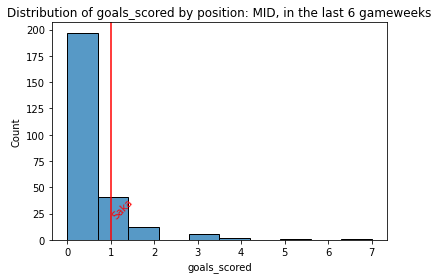

<Figure size 432x288 with 0 Axes>

In [46]:
# Test function. Seems to work well        
player_report('Antonio', metric = 'ict_index')
player_report('Havertz', gameweeks=3, metric='assists')
player_report('Saka', gameweeks=6, metric='goals_scored')

In [63]:
from statistics import mode

# Now going to make the same function but working for multiple players, either for comparison or for a whole team

def player_report_multi(player_list, gameweeks='all', metric='total_points', position=True):
       
    if position==True:    
        # Check whether the user has inputted anything into the function for "gameweeks"
        if gameweeks=='all':
            points_df = points
        else:
            points_df = points.loc[points['round'] >= max(points['round']) - gameweeks]
    
        # Filter points df for specific players
        player_list_df = points_df.loc[points_df.web_name.str.contains("|".join(player_list))]
        
        # Find most common player position in the list, in order to only plot the players we want, rather than others
        # who happen to have the same name
        position = mode(player_list_df.singular_name_short)
        
        # Change points df and player list df to just players of the right position
        points_df = points_df[points_df.singular_name_short == position]
        player_list_df = player_list_df[player_list_df.singular_name_short == position]
        agg_df = aggregate(player_list_df)
    
        # Print table with stats for how the player has performed over the past n weeks
        display(agg_df)
    
        # Plotting histogram of points scored against players of their position
        ax = sns.histplot(data = aggregate(points_df), x = metric)
        title = 'Distribution of {m} by position: {p}, in the last {n} gameweeks'.format(m=metric, p=position, n=gameweeks)
        ax.set_title(title)
        for i in range(len(agg_df)):
            ax.axvline(agg_df[metric][i], color = 'red')
            plt.text(agg_df[metric][i], 20*i, agg_df['web_name'][i], rotation=45, color='red')
        plt.show()
        plt.clf()
        
    else:
        # Check whether the user has inputted anything into the function for "gameweeks"
        if gameweeks=='all':
            points_df = points
        else:
            points_df = points.loc[points['round'] >= max(points['round']) - gameweeks]
    
        # Filter points df for specific players
        player_list_df = points_df.loc[points_df.web_name.str.contains("|".join(player_list))]
        agg_df = aggregate(player_list_df)
    
        # Print table with stats for how the player has performed over the past n weeks
        display(agg_df)
        # Else plotting histogram of points scored by all players
        ax = sns.histplot(data = aggregate(points_df), x = metric)
        title = 'Distribution of {m} in the last {n} gameweeks by players'.format(m=metric, n=gameweeks)
        ax.set_title(title)
        for i in range(len(agg_df)):
            ax.axvline(agg_df[metric][i], color = 'red')
            plt.text(agg_df[metric][i], 20*i, agg_df['web_name'][i], rotation=45, color='red')
        plt.show()
        plt.clf()

,element,web_name,total_points,goals_scored,assists,clean_sheets,ict_index,value
2,142,James,53,3,2,3,49.9,60
3,237,Alexander-Arnold,38,1,4,2,42.1,77
0,127,Rüdiger,31,1,1,3,26.0,59
1,135,Chilwell,31,1,1,3,30.6,60
4,256,Cancelo,29,0,3,2,30.7,65


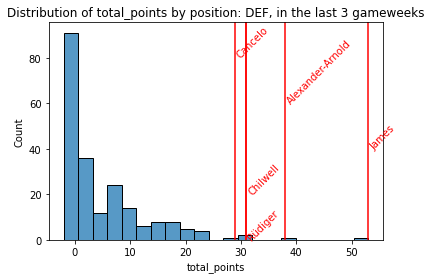

<Figure size 432x288 with 0 Axes>

In [64]:
# Test it
player_report_multi(['Chilwell', 'Cancelo', 'Rüdiger', 'James', 'Alexander-Arnold'], gameweeks = 3, metric='total_points')

In [65]:
# Now going to make a scatter plotter, that takes any number of players, and plots their aggregate of one stat against
# another, for a given number of gameweeks

def statter_plot(player_list, metric1, gameweeks='all', metric2='value', position=True):
    if (position == True):
        # Check whether the user has inputted anything into the function for "gameweeks"
        if gameweeks=='all':
            points_df = points
        else:
            points_df = points.loc[points['round'] >= max(points['round']) - gameweeks]

        # Filter points df for specific players
        player_list_df = points_df.loc[points_df.web_name.str.contains("|".join(player_list))]
        
        # Find most common player position in the list, in order to only plot the players we want, rather than others
        # who happen to have the same name
        position = mode(player_list_df.singular_name_short)
        
        # Change points df and player list df to just players of the right position
        points_df = points_df[points_df.singular_name_short == position]
        player_list_df = player_list_df[player_list_df.singular_name_short == position]
        agg_df = aggregate(player_list_df)
        
        # Print table with stats for how the player has performed over the past n weeks
        display(agg_df)
        
        # Plotting scatter plot of metric against second metric
        fig, ax = plt.subplots(figsize = (12, 7))
        sns.scatterplot(data = aggregate(points_df), x = metric1, y = metric2)
        sns.scatterplot(data = agg_df, x = metric1, y = metric2, color = 'red')
        title = 'Scatter plot of {m1} against {m2} for position {p} in the last {n} gameweeks'.format(m1=metric1, m2=metric2, p=position, n=gameweeks)
        ax.set_title(title)
        for i in range(len(agg_df)):
            plt.text(agg_df[metric1][i] + 0.2, agg_df[metric2][i] + 0.2, agg_df['web_name'][i], rotation=45, color='black')
        plt.show()
        plt.clf()
        
    else:
        # Check whether the user has inputted anything into the function for "gameweeks"
        if gameweeks=='all':
            points_df = points
        else:
            points_df = points.loc[points['round'] >= max(points['round']) - gameweeks]

        # Filter points df for specific players
        player_list_df = points_df.loc[points_df.web_name.str.contains("|".join(player_list))]
        agg_df = aggregate(player_list_df)

        # Print table with stats for how the player has performed over the past n weeks
        display(agg_df)

        # Plotting scatter plot of metric against second metric
        fig, ax = plt.subplots(figsize = (12, 7))
        sns.scatterplot(data = aggregate(points_df), x = metric1, y = metric2)
        sns.scatterplot(data = agg_df, x = metric1, y = metric2, color = 'red')
        title = 'Scatter plot of {m1} against {m2} in the last {n} gameweeks'.format(m1=metric1, m2=metric2, n=gameweeks)
        ax.set_title(title)
        for i in range(len(agg_df)):
            plt.text(agg_df[metric1][i] + 0.2, agg_df[metric2][i] + 0.2, agg_df['web_name'][i], rotation=45, color='black')
        plt.show()
        plt.clf()

,element,web_name,total_points,goals_scored,assists,clean_sheets,ict_index,value
3,237,Alexander-Arnold,79,1,6,6,105.6,77
4,256,Cancelo,79,0,5,8,80.9,65
2,142,James,75,4,4,4,72.3,60
0,127,Rüdiger,67,2,1,7,51.9,59
1,135,Chilwell,54,3,1,4,54.0,60


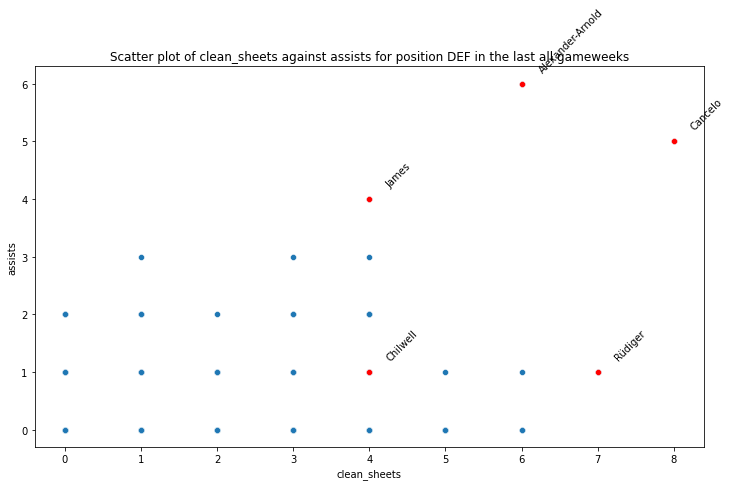

,element,web_name,total_points,goals_scored,assists,clean_sheets,ict_index,value
0,419,Benrahma,59,3,3,3,79.5,66
1,420,Bowen,57,2,6,3,103.9,65
4,423,Fornals,52,4,2,3,81.9,60
2,421,Rice,42,1,3,3,59.3,50
3,422,Soucek,37,1,1,3,56.4,60


<Figure size 432x288 with 0 Axes>

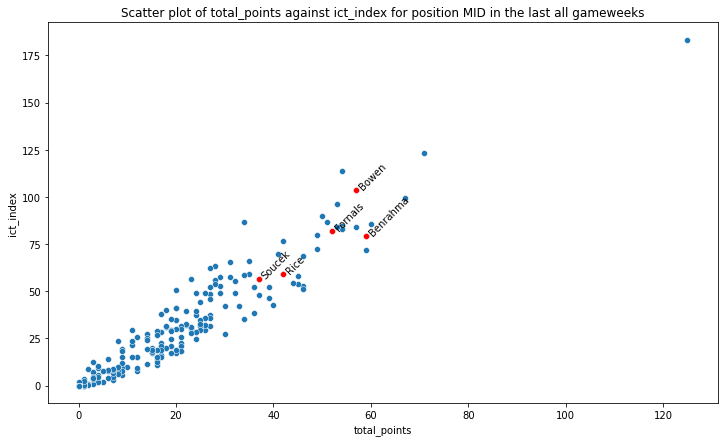

<Figure size 432x288 with 0 Axes>

In [69]:
# Test it out for some different metrics
statter_plot(['Chilwell', 'Cancelo', 'Rüdiger', 'James', 'Alexander-Arnold'], metric1='clean_sheets', metric2='assists')

statter_plot(['Benrahma', 'Fornals', 'Bowen', 'Soucek', 'Rice'], 'total_points', metric2='ict_index')

,element,web_name,total_points,goals_scored,assists,clean_sheets,ict_index,value
0,144,Gallagher,67,4,5,4,99.6,59
1,419,Benrahma,59,3,3,3,79.5,66
2,484,Gray,49,3,2,3,79.8,58


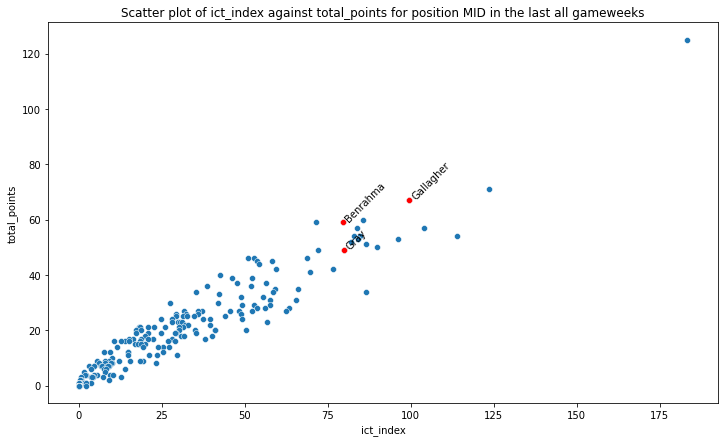

,element,web_name,total_points,goals_scored,assists,clean_sheets,ict_index,value
2,334,McCarthy,48,0,0,5,24.8,46
1,146,Guaita,46,0,0,4,28.2,46
0,69,Sánchez,35,0,0,4,23.3,46


<Figure size 432x288 with 0 Axes>

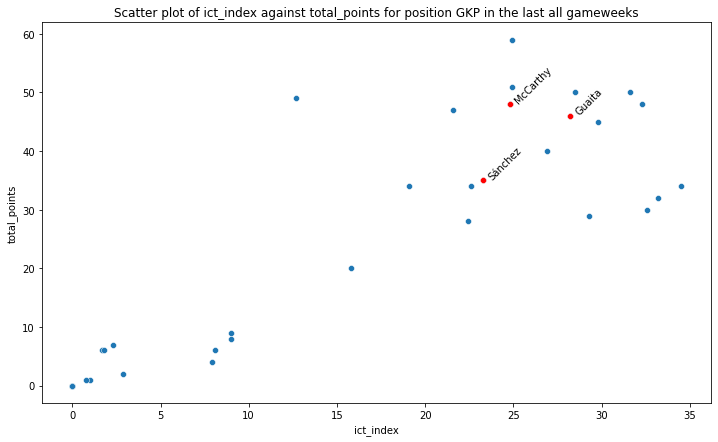

<Figure size 432x288 with 0 Axes>

In [70]:
statter_plot(['Gallagher', 'Benrahma', 'Gray'], metric2='total_points', metric1='ict_index')

statter_plot(['Guaita', 'Sánchez', 'McCarthy'], metric2='total_points', metric1='ict_index')